In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
with open('data.json', 'r') as f:
    data = json.load(f)

# Execution time comparison

In [3]:
# seq
global_time_seq = [entry["Time (s)"] for entry in data["seq"]]
hotspot_time_seq = [entry["Hotspot"]["Time (s)"] for entry in data["seq"]]
# parallel
global_time_parallel = [entry["Time (s)"] for entry in data["parallel"]]
hotspot_time_parallel = [entry["Hotspot"]
                         ["Time (s)"] for entry in data["parallel"]]
# cuda
global_time_cuda = [entry["Time (s)"] for entry in data["cuda"]]

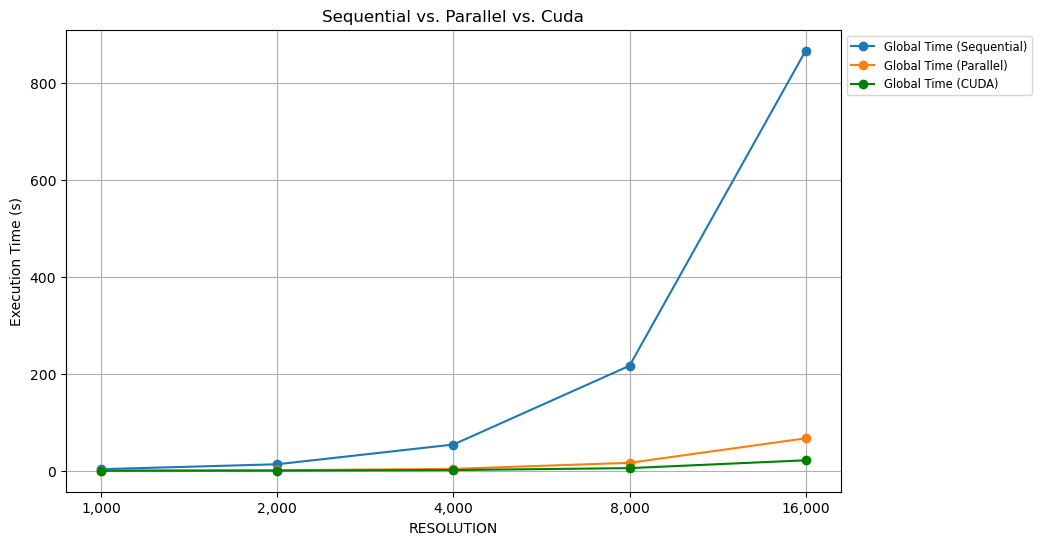

In [6]:
plt.figure(figsize=(10, 6))
plt.plot([f"{entry['RESOLUTION']:,}" for entry in data["cuda"]],
         global_time_seq, label="Global Time (Sequential)", marker='o')
plt.plot([f"{entry['RESOLUTION']:,}" for entry in data["cuda"]],
         global_time_parallel, label="Global Time (Parallel)", marker='o')
plt.plot([f"{entry['RESOLUTION']:,}" for entry in data["cuda"]],
         global_time_cuda, label="Global Time (CUDA)", color="green", marker='o')

plt.xlabel("RESOLUTION")
plt.ylabel("Execution Time (s)")
# plt.ylim(0, max(global_time_mpi + global_time_parallel) + 10)
plt.legend(loc="upper left", fontsize='small',
           title_fontsize='medium', bbox_to_anchor=(1, 1))
plt.title("Sequential vs. Parallel vs. Cuda")
plt.grid(True)
plt.show()

# Speedup & efficiency

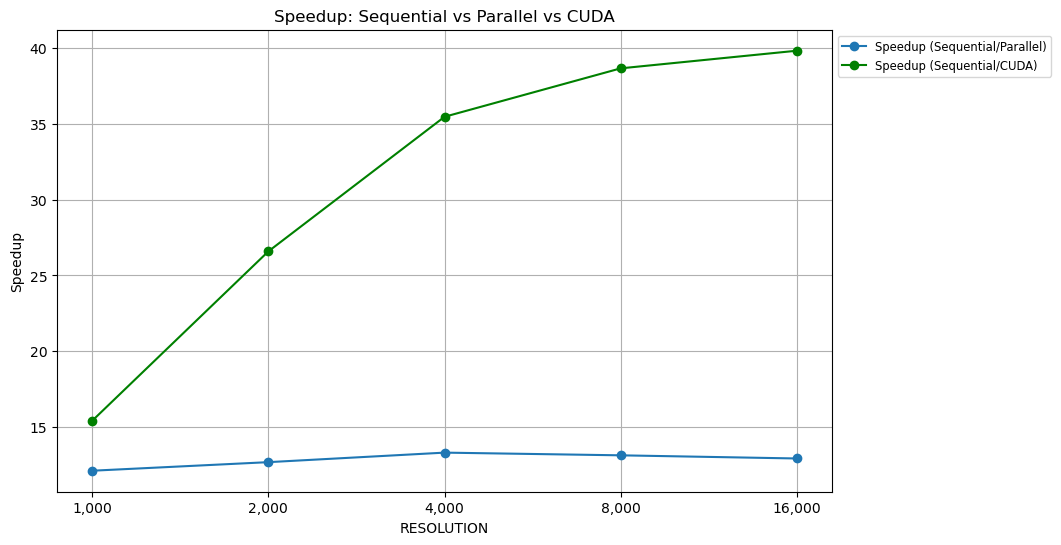

In [7]:
speedup_seq_parallel = [global_time_seq[i] / global_time_parallel[i]
                        for i in range(len(global_time_seq))]
speedup_seq_cuda = [global_time_seq[i] / global_time_cuda[i]
                    for i in range(len(global_time_seq))]

avg_speedup_seq_parallel = sum(
    speedup_seq_parallel) / len(speedup_seq_parallel)
avg_speedup_seq_cuda = sum(speedup_seq_cuda) / len(speedup_seq_cuda)

plt.figure(figsize=(10, 6))
plt.plot([f"{entry['RESOLUTION']:,}" for entry in data["cuda"]],
         speedup_seq_parallel, label="Speedup (Sequential/Parallel)", marker='o')
plt.plot([f"{entry['RESOLUTION']:,}" for entry in data["cuda"]],
         speedup_seq_cuda, label="Speedup (Sequential/CUDA)", marker='o', color='green')
plt.xlabel("RESOLUTION")
plt.ylabel("Speedup")
plt.title("Speedup: Sequential vs Parallel vs CUDA")
plt.legend(loc="upper left", fontsize='small', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()